In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import files
files.upload()

if (not os.path.exists("/root/.kaggle/kaggle.json")):
  !mkdir ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  print("Kaggle.json copied")
else:
  print("Kaggle.json already exists")

Saving kaggle.json to kaggle.json
Kaggle.json copied


In [4]:
!kaggle datasets download -d yasserhessein/epileptic-seizure-recognition

Dataset URL: https://www.kaggle.com/datasets/yasserhessein/epileptic-seizure-recognition
License(s): unknown
  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 118MB/s]


In [5]:
os.mkdir("dataset")
shutil.unpack_archive("epileptic-seizure-recognition.zip", "dataset")

In [6]:
!ls dataset

'Epileptic Seizure Recognition.csv'


In [23]:
data = pd.read_csv('/content/dataset/Epileptic Seizure Recognition.csv')

In [24]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


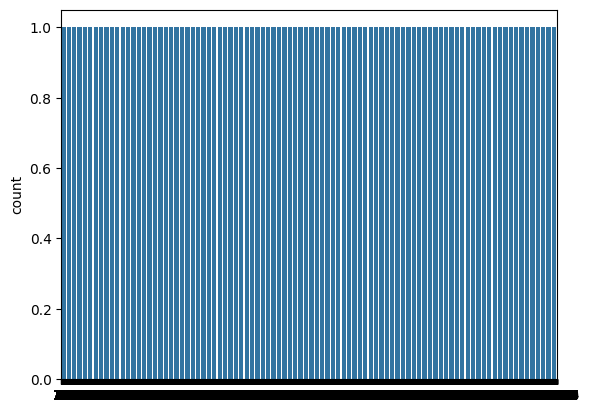

The number of trials for the non-seizure class is :  9200
The number of trials for the seizure class is :  2300


In [25]:
cols = data.columns
data = data.drop(columns=['Unnamed'])
target = data['y']
target[target>1] = 0
sns.countplot(target)
plt.show()
non_seizure, seizure = target.value_counts()

print('The number of trials for the non-seizure class is : ', non_seizure)
print('The number of trials for the seizure class is : ', seizure)

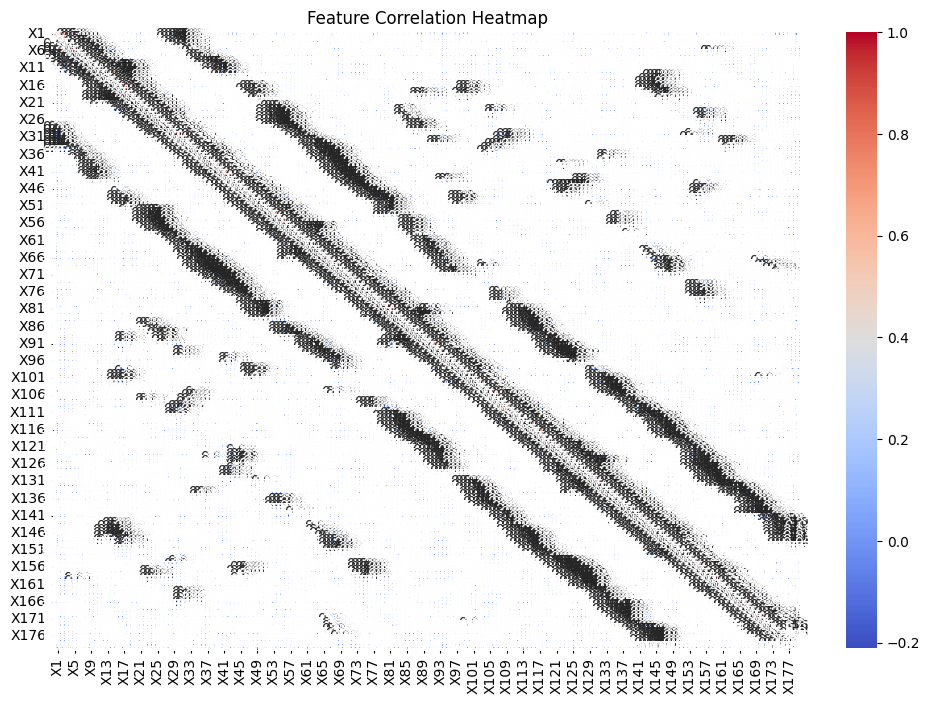

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [26]:
data.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0
X10,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [28]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [29]:
print(data.head())


    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  0  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  0  
3   -77   -85   -77   -72   -69   -65  0  
4   -32   -41   -65   -83   -89   -73  0  

[5 rows x 179 columns]


In [30]:
# Split the data into features and labels

X = data.iloc[:, :-1].values
y = target.values

# Ensure all feature values are numeric
X = X.astype(float)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Reshape data to fit a 1D CNN input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [41]:
# Define a simple 1D CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
288/288 [==============================] - 5s 15ms/step - loss: 0.1853 - accuracy: 0.9297 - val_loss: 0.1073 - val_accuracy: 0.9583
Epoch 2/10
288/288 [==============================] - 5s 17ms/step - loss: 0.0886 - accuracy: 0.9639 - val_loss: 0.0751 - val_accuracy: 0.9683
Epoch 3/10
288/288 [==============================] - 7s 24ms/step - loss: 0.0691 - accuracy: 0.9733 - val_loss: 0.0624 - val_accuracy: 0.9761
Epoch 4/10
288/288 [==============================] - 7s 23ms/step - loss: 0.0597 - accuracy: 0.9785 - val_loss: 0.0620 - val_accuracy: 0.9761
Epoch 5/10
288/288 [==============================] - 8s 28ms/step - loss: 0.0441 - accuracy: 0.9832 - val_loss: 0.0586 - val_accuracy: 0.9800
Epoch 6/10
288/288 [==============================] - 6s 22ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0644 - val_accuracy: 0.9791
Epoch 7/10
288/288 [==============================] - 9s 31ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0602 - val_accuracy: 0.9809

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

72/72 [==============================] - 1s 8ms/step - loss: 0.0647 - accuracy: 0.9809
Test Loss: 0.06
Test Accuracy: 0.98


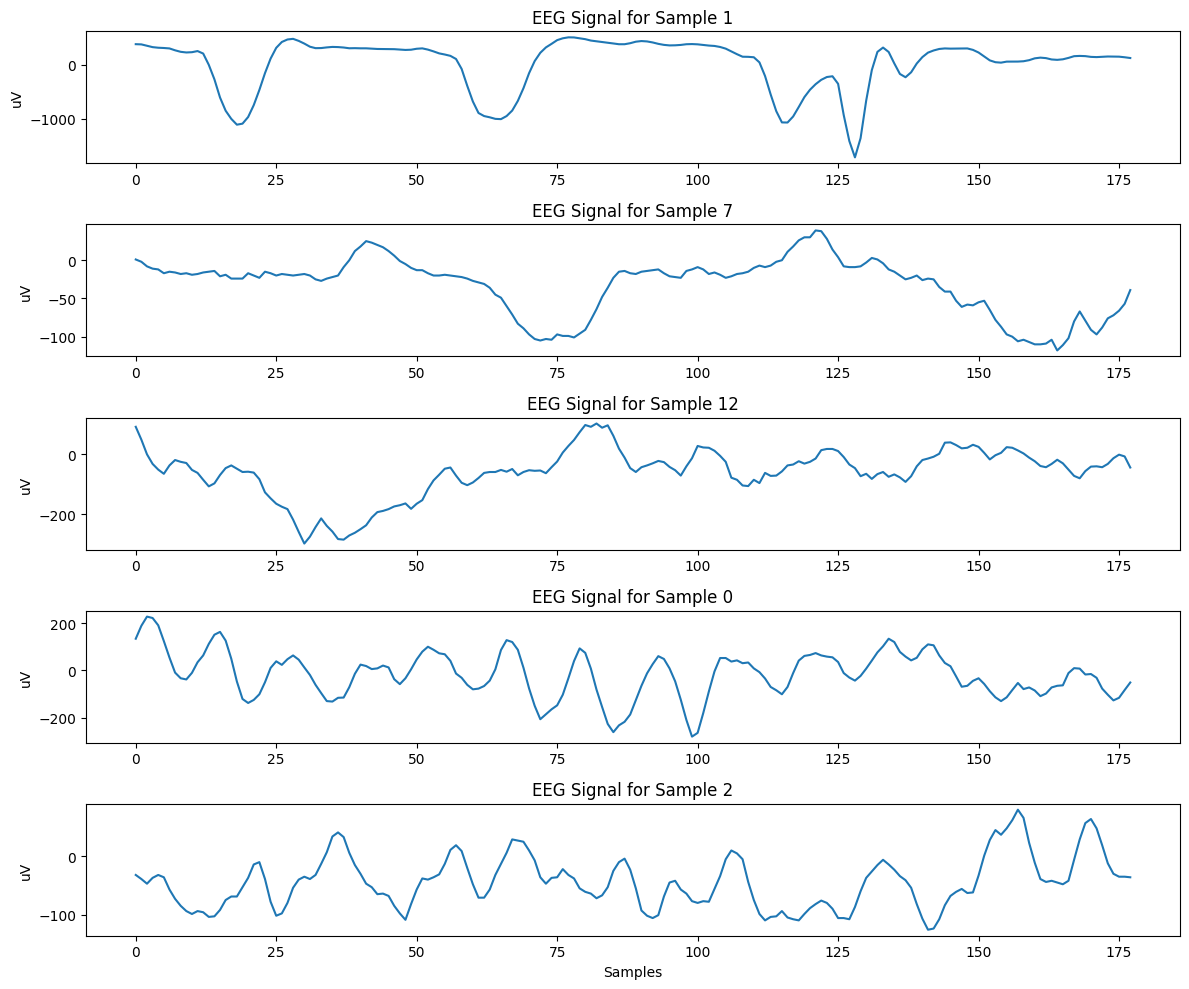

In [45]:
plt.figure(figsize=(12, 10))

plt.subplot(511)
plt.plot(range(len(X[1, :])), X[1, :])
plt.title('EEG Signal for Sample 1')
plt.ylabel('uV')

plt.subplot(512)
plt.plot(range(len(X[7, :])), X[7, :])
plt.title('EEG Signal for Sample 7')
plt.ylabel('uV')

plt.subplot(513)
plt.plot(range(len(X[12, :])), X[12, :])
plt.title('EEG Signal for Sample 12')
plt.ylabel('uV')

plt.subplot(514)
plt.plot(range(len(X[0, :])), X[0, :])
plt.title('EEG Signal for Sample 0')
plt.ylabel('uV')

plt.subplot(515)
plt.plot(range(len(X[2, :])), X[2, :])
plt.title('EEG Signal for Sample 2')
plt.xlabel('Samples')
plt.ylabel('uV')

plt.tight_layout()
plt.show()

In [46]:
model.save('EEG_Seizure_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
saved_model = tf.keras.models.load_model('EEG_Seizure_detection_model.h5')

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (saved_model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

72/72 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.96      0.94      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [53]:
# Convert predictions and actual values to labels
y_pred_labels = np.where(y_pred == 1, "Seizure", "Non-Seizure")
y_test_labels = np.where(y_test == 1, "Seizure", "Non-Seizure")

In [55]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

 Non-Seizure       0.99      0.99      0.99      1835
     Seizure       0.96      0.94      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [56]:
print(confusion_matrix(y_test_labels, y_pred_labels))

[[1818   17]
 [  27  438]]


In [57]:
loss, accuracy = saved_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

72/72 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9809
Test Loss: 0.06
Test Accuracy: 0.98


In [58]:
import random

# Function to randomly select and predict samples
def predict_random_samples(model, X_test, y_test, num_samples=5):
    # Randomly select indices for seizure and non-seizure samples
    seizure_indices = np.where(y_test == 1)[0]
    non_seizure_indices = np.where(y_test == 0)[0]

    random_seizure_indices = random.sample(list(seizure_indices), min(num_samples, len(seizure_indices)))
    random_non_seizure_indices = random.sample(list(non_seizure_indices), min(num_samples, len(non_seizure_indices)))

    selected_indices = random_seizure_indices + random_non_seizure_indices
    random.shuffle(selected_indices)

    # Predict and display results
    for index in selected_indices:
        sample = X_test[index].reshape(1, X_test.shape[1], 1)
        actual_label = "Seizure" if y_test[index] == 1 else "Non-Seizure"
        predicted_label = "Seizure" if model.predict(sample) > 0.5 else "Non-Seizure"

        print(f"Sample index: {index}")
        print(f"Actual label: {actual_label}")
        print(f"Predicted label: {predicted_label}")
        print("")

# Call the function to predict random samples
predict_random_samples(saved_model, X_test, y_test, num_samples=5)


1/1 [==============================] - 0s 25ms/step
Sample index: 2298
Actual label: Seizure
Predicted label: Seizure

1/1 [==============================] - 0s 23ms/step
Sample index: 1155
Actual label: Non-Seizure
Predicted label: Non-Seizure

1/1 [==============================] - 0s 22ms/step
Sample index: 1865
Actual label: Seizure
Predicted label: Seizure

1/1 [==============================] - 0s 23ms/step
Sample index: 1242
Actual label: Seizure
Predicted label: Seizure

1/1 [==============================] - 0s 21ms/step
Sample index: 1760
Actual label: Seizure
Predicted label: Seizure

1/1 [==============================] - 0s 21ms/step
Sample index: 1969
Actual label: Non-Seizure
Predicted label: Non-Seizure

1/1 [==============================] - 0s 21ms/step
Sample index: 2174
Actual label: Non-Seizure
Predicted label: Non-Seizure

1/1 [==============================] - 0s 21ms/step
Sample index: 1128
Actual label: Non-Seizure
Predicted label: Non-Seizure

1/1 [===========

In [62]:
unique_elements, counts = np.unique(y_test, return_counts=True)
num_unique = len(unique_elements)

print("Unique elements in y_test:", unique_elements)
print("Counts of each unique element:", counts)
print("Number of unique elements:", num_unique)



Unique elements in y_test: [0 1]
Counts of each unique element: [1835  465]
Number of unique elements: 2
